In [19]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
from Wind.Results import DBResults
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import seaborn as sns
from Wind.Private.DBConfig import mongolocaltest, mongolocal
import matplotlib.pyplot as plt

# Fitting KNNdir reg

In [21]:
query={'experiment':'knndir'}

results = DBResults(conn=mongolocaltest)
#results = DBResults()

results.retrieve_results_dataframe(query, arch=['n_neighbors'], data=['lag'])

In [22]:
a=results.exp_df.groupby(['site','n_neighbors','lag'],as_index=False).sum()
a.drop(columns=['hour', 'site'], inplace=True)
len(a)

295

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa64423a588>,
      dtype=object)

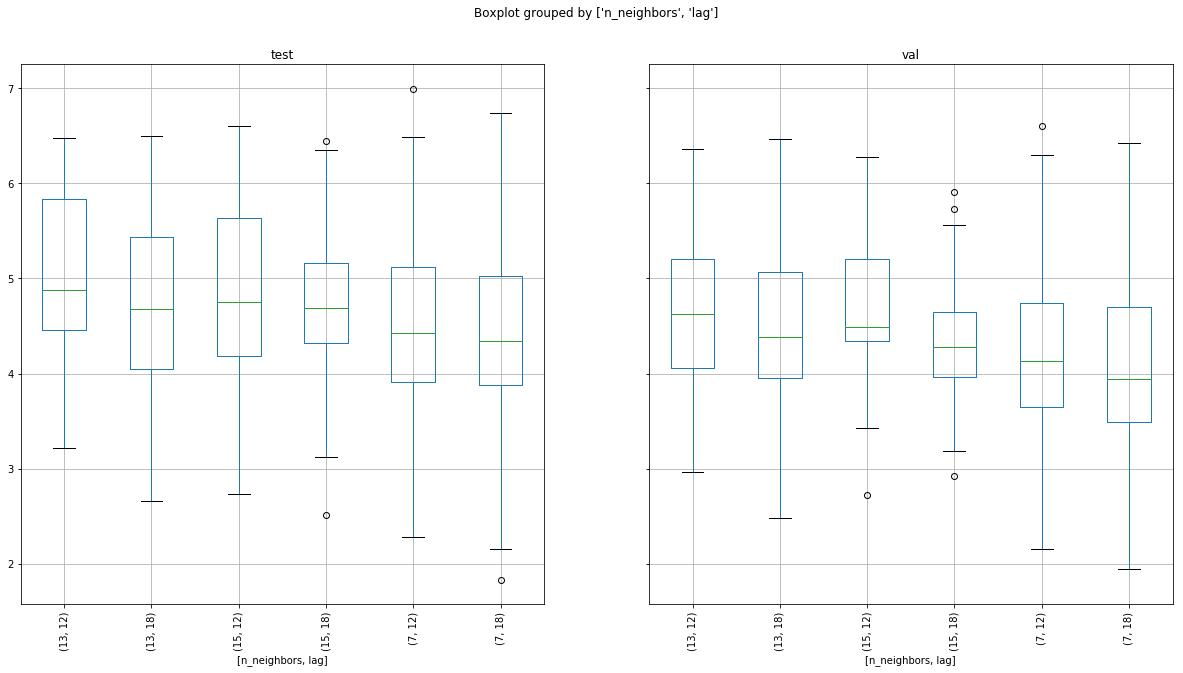

In [23]:
a.boxplot(by=['n_neighbors','lag'],figsize=(20,10), rot=90)

In [24]:
b =a.groupby(by=['n_neighbors','lag'],as_index=False).mean()
b.style.highlight_max()

,n_neighbors,lag,test,val
0,13,12,4.98407,4.64886
1,13,18,4.6927,4.41225
2,15,12,4.89084,4.71114
3,15,18,4.68521,4.38043
4,7,12,4.43749,4.17013
5,7,18,4.31555,4.02643


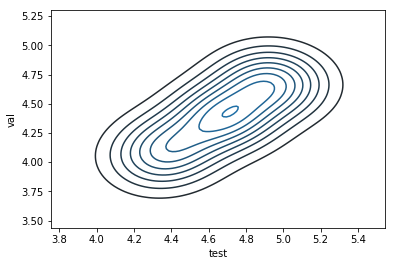

In [25]:
sns.kdeplot(b['test'],b['val'])

In [26]:
a.groupby(by=['n_neighbors','lag'],as_index=False).count()

,n_neighbors,lag,test,val
0,13,12,24,24
1,13,18,37,37
2,15,12,25,25
3,15,18,30,30
4,7,12,103,103
5,7,18,76,76
